# Proyecto Integrado 6

# Introdución
La tienda online Ice vende videojuegos por todo el mundo. Se cuenta con un set de datos historicos sobre ventas de juegos,reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation).Los cuales se analizaran para determinar los patrones que determinen si un juego tiene exito o no, y poder hacer una recomendacion para la campaña publicitaria del siguiente año.

## Diccionario  de datos
Se cuenta con una sola tabla con las siguientes columnas

— `Name`:  (Nombre)

— `Platform`: (Plataforma)

— `Year_of_Release`: (Año de lanzamiento)

— `Genre`: (Género) 

— `NA_sales`: (ventas en Norteamérica en millones de dólares estadounidenses) 

— `EU_sales`: (ventas en Europa en millones de dólares estadounidenses) 

— `JP_sales`: (ventas en Japón en millones de dólares estadounidenses) 

— `Other_sales`: (ventas en otros países en millones de dólares estadounidenses) 

— `Critic_Score`: (máximo de 100) 

— `User_Score`: (máximo de 10) 

— `Rating`: (ESRB)


## Set up de datos
Se descargan las librerias correspondientes y se lee el set de datos

In [ ]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import math as mt


In [ ]:
games_df = pd.read_csv("/datasets/games.csv")

## Pre-procesamiento de datos : analisis y limpieza
Se analiza la tabla de datos, se buscan datos nulos, duplicados, tipo de formato y se limpian correspondientemente.

In [ ]:
display(games_df)
print()
display(games_df.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [ ]:
games_df.isna().sum()
#saco el % de los valores ausentes
100*games_df.isna().sum()/games_df.shape[0]

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

### Pre-procesamiento
1. Se pasan los nombres de las columnas a minusculas
2. Los valores nulos encontrados se dejaran así ya que son muchos casi el 50% ,por los que el agregarles algun valor podria afectar el resultado del analisis.
3. La columna year_of_release, critic_score se pasan a formato float.
4. Se hace la suma total de todas las ventas


In [ ]:
# visualizo los datos unicos de user score para detectar los tbd
games_df.User_Score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
# Cambio a minusculas todos los nombres de las columnas
new_col_names = []        

for old_name in games_df.columns:
    name_lowered = old_name.lower()
    new_col_names.append(name_lowered)
    
games_df.columns = new_col_names


# Se pasan a nan los tbd 
games_df["user_score"] = pd.to_numeric(games_df["user_score"], errors = "coerce")
games_df["year_of_release"] = pd.to_numeric(games_df["year_of_release"], errors = "coerce")
games_df['critic_score'] = pd.to_numeric(games_df['critic_score'], errors = "coerce")

# Se cambia los nan de critic_score a unknown
#games_df['critic_score'] = games_df['critic_score'].fillna("Unknown")


# Se genera columna con las ventas totales de cada juego
games_df["total_sales"] = games_df["na_sales"] + games_df["eu_sales"] + games_df["jp_sales"] + games_df["other_sales"]

#print(games_df.dtypes)
display(games_df)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [ ]:
# se saca la informacion de las tablas para ver los valores nulos
print()
display(games_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


None

Ya que los valores nulos valor las columnas "User_score", "Rating" son casi la mitada de las informacion, se mantienen asi, mientras que para las columnas Name y year_of_release son muy pocas pero contienen los demas valores nos pueden ayudar al mantenerlas aunque el año no tenga el dato.

In [ ]:
games_df.user_score.unique() # se confirma que solo hayan quedado los valores nan

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

##  Analisis de datos

1. Se  analizara cuantos juegos fueron lanzados en diferentes años
2. Variacion de ventas de una plataforma a otra, con grafico de distribucion
3. Plataformas lideres en ventas con potencial de rentabilidad
4. Analisis de ventas globales por plataforma con caja de bigotes
5. Grafico de dispersion con correlacion entre reseña y venta



### Juego por año

In [ ]:
#Se crea table de cuantos juegos se liberaron por año
juegos_por_año = games_df.groupby("year_of_release")["name"].count().reset_index()
display(juegos_por_año)


,year_of_release,name
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


<AxesSubplot:xlabel='year_of_release'>

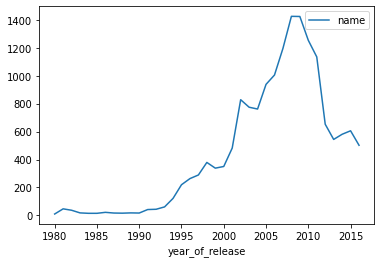

In [ ]:
# grafica de ventas por año
juegos_por_año.plot(kind = "line", x= "year_of_release", y= "name" )

Se observa como a partir del año 94 hasta el 2008 aproximadamente hubo un crecimiento exponencia de las ventas de los juegos, y a partir del año 2010 empezo un declive en las ventas.

### Ventas por plataforma

In [ ]:
# Se crea una tabla para cuantificar las ventas por plataforma y se muestra el top5
ventas_por_plat = games_df.pivot_table(index = "platform" , values = "total_sales", aggfunc = "sum")
ventas_por_plat.sort_values(by ="total_sales", ascending=False).head(5)



,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


Se muestra el top 5 de plataformas con mas ventas acumuladas, teniendo como top1 el PS2

In [ ]:
# se crea lista para trabajar solo con los top 5, y se corrobora que se haya creado correctamente
platform_list = ("PS2","X360","PS3","Wii","DS")
games_top_plat = games_df[games_df["platform"].isin(platform_list)]
games_top_plat["platform"].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2'], dtype=object)

In [ ]:
# se agrupan por año de venta y plataforma del top 5
plat_distribution = games_top_plat.groupby(["year_of_release","platform"])["total_sales"].sum().reset_index()
plat_distribution.head()

,year_of_release,platform,total_sales
0,1985.0,DS,0.02
1,2000.0,PS2,39.17
2,2001.0,PS2,166.43
3,2002.0,PS2,205.38
4,2003.0,PS2,184.31


<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

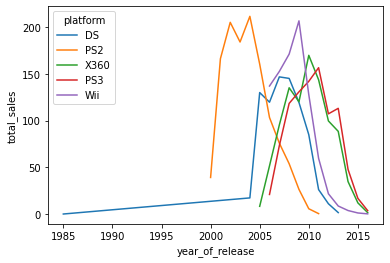

In [ ]:
# se genera grafico de distribucion
sns.lineplot(data = plat_distribution, hue = "platform", x = "year_of_release", y = "total_sales")

Con el grafico de distribucion podemos apreciar que aunque el PS2 es el que mas ventas acumuladas ha tenido, su auge fue en el años 2004 y despues del 2010 ya no ha tenido ventas. En gral podemos ver que las plataformas tienen un crecimiento exponencial despues de su lanzamiento alrededor de 5 años que logran su punto maximo de ventas. y despues llega su declive por otros  5 años.
Por lo que se puede concluir que se debe considerar un periodo de aprox 5 años para los analisis futuros.

<AxesSubplot:xlabel='total_sales', ylabel='platform'>

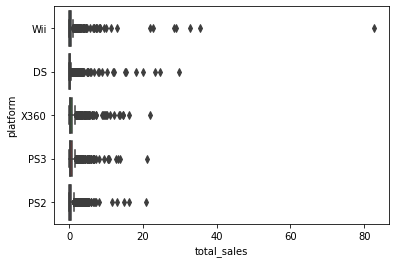

In [ ]:
# se crea diagrama de cjaa de bigotes 
sns.boxplot(data = games_top_plat, x = "total_sales", y = "platform")

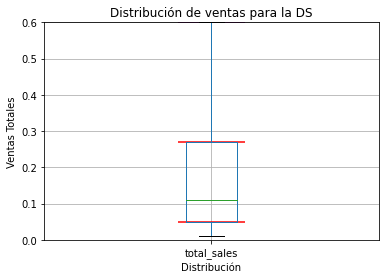

In [ ]:
Q1_DS = games_top_plat.query('platform == "DS"')['total_sales'].quantile(0.25)
Q3_DS = games_top_plat.query('platform == "DS"')['total_sales'].quantile(0.75)
IQR_DS = Q3_DS - Q1_DS

games_top_plat.query('platform == "DS"').boxplot(column='total_sales')
plt.xlabel('Distribución')
plt.ylabel('Ventas Totales')
plt.title('Distribución de ventas para la DS')

plt.ylim(0, 0.6)
plt.hlines(y=[Q1_DS, Q3_DS], xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=(Q3_DS+1.5*IQR_DS), xmin=0.9, xmax=1.1, color='purple')
plt.hlines(y=(Q1_DS-1.5*IQR_DS), xmin=0.9, xmax=1.1, color='purple')
plt.show(block=False)

1. Crear df con:
- Plataforma.
- Limite inferior.
- Limite superior.

2.  Hacer merge del df creado con el original

3. Hacer operaciones columnas para filtar

Se aprecia que hay mucho datos atipicos por lo cual se procede a limpiarlos para poder apreciar los datos relevantes

<AxesSubplot:xlabel='total_sales', ylabel='platform'>

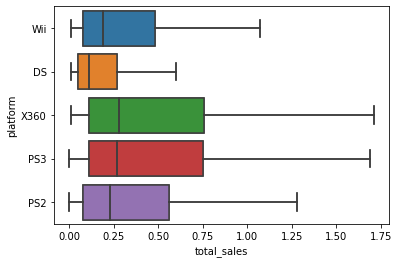

In [ ]:
sns.boxplot(data = games_top_plat, x = "total_sales", y = "platform", showfliers = False)
sns.boxplot(data = games_top_plat, x = "total_sales", y = "platform", showfliers = False)

Se puede apreaciar que tnato el X360 y el PS3 comparten una media y maximos, mientras que el PS2 esta un poco por detras en su media aunque no tiene maximos tan altos , dejando como ultima plataforma del top 5 al DS.

### Ventas y reseñas


In [ ]:
# creo una tabla filtrando solo los juegos de PS2
PS2_sales_reviews = games_df[games_df["platform"] == "PS2"].reset_index()
# elimino los valores de user_score NaN ya que no serviran para hacer la relacion de user_score y venta
PS2_sales_reviews.dropna(inplace = True)
display(PS2_sales_reviews)


,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
1,24,Grand Theft Auto: Vice City,PS2,2002.0,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
2,28,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
3,38,Grand Theft Auto III,PS2,2001.0,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
4,48,Gran Turismo 4,PS2,2004.0,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,16011,Kao the Kangaroo Round 2,PS2,2005.0,Platform,0.01,0.01,0.00,0.00,58.0,8.7,E,0.02
2088,16050,Just Cause,PS2,2006.0,Action,0.01,0.01,0.00,0.00,67.0,7.9,M,0.02
2118,16287,Metal Slug Anthology,PS2,2007.0,Shooter,0.00,0.00,0.01,0.00,80.0,8.1,T,0.01
2133,16429,Greg Hastings' Tournament Paintball Max'd,PS2,2006.0,Shooter,0.01,0.00,0.00,0.00,70.0,9.2,E10+,0.01


,user_score,total_sales
0,1.7,0.41
1,2.0,0.24
2,2.1,0.20
3,2.3,0.14
4,2.6,1.12
...,...,...
65,9.0,64.11
66,9.1,34.14
67,9.2,7.05
68,9.3,9.04


0.6896626625895572

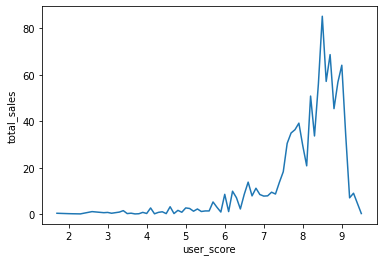

In [ ]:
PS2_sales_reviews2 = PS2_sales_reviews[["user_score","total_sales"]]
PS2_sales_reviews2 = PS2_sales_reviews2.groupby(["user_score"])["total_sales"].sum().reset_index()


display(PS2_sales_reviews2)
# se genera grafico de distribucion
sns.lineplot(data = PS2_sales_reviews2,  x = "user_score", y = "total_sales")
#sacamos el calculo de correlacion para el score y las ventas
PS2_sales_reviews2["user_score"].corr(PS2_sales_reviews2["total_sales"])


Gracias a la gráfica de dispersion, podemos ver inferir que los juegos con un user_score entre 7.5 y 9 tienen mayores ventas. Aunque tambien se pudiera deber a las ventas de un juego en especifico con un buen score. El coeficiente de pearson es de 0.68 lo que indica que estan medianmente correlacionados.

,user_score,total_sales
0,1.7,0.41
1,2.0,0.24
2,2.1,0.20
3,2.3,0.14
4,2.6,1.12
...,...,...
65,9.0,64.11
66,9.1,34.14
67,9.2,7.05
68,9.3,9.04


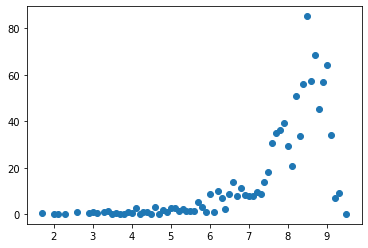

In [ ]:
PS2_sales_reviews3 = PS2_sales_reviews[["user_score","total_sales"]]
PS2_sales_reviews3 = PS2_sales_reviews2.groupby(["user_score"])["total_sales"].sum().reset_index()

x = PS2_sales_reviews3["user_score"]
y = PS2_sales_reviews3["total_sales"]
display(PS2_sales_reviews3)
# se genera grafico de distribucion
#sns.lineplot(data = PS2_sales_reviews2,  x = "user_score", y = "total_sales")
plt.scatter(x , y)
plt.show()


,critic_score,total_sales
0,24.0,0.10
1,27.0,0.08
2,30.0,0.31
3,31.0,0.05
4,32.0,1.42
...,...,...
64,93.0,18.62
65,94.0,18.25
66,95.0,56.07
67,96.0,9.67


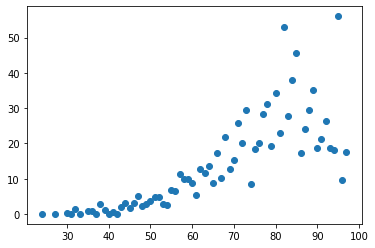

In [ ]:
PS2_sales_reviews3 = PS2_sales_reviews[["critic_score","total_sales"]]
PS2_sales_reviews3 = PS2_sales_reviews3.groupby(["critic_score"])["total_sales"].sum().reset_index()

x = PS2_sales_reviews3["critic_score"]
y = PS2_sales_reviews3["total_sales"]
display(PS2_sales_reviews3)
# se genera grafico de distribucion
#sns.lineplot(data = PS2_sales_reviews2,  x = "user_score", y = "total_sales")
plt.scatter(x , y)
plt.show()

Con la grafica scatter podemos ver como los juegos con califiaciones de 7.5 a 9 son los que mas ventas han tenido

### Ventas en diferentes plataformas

In [ ]:
# se extrae un solo juego que esta en la misma plataforma, buscando los duplicados

games_top_plat_duplicated = games_df[games_df["name"].duplicated()]
display(games_top_plat_duplicated.head(10))
# se filtra por solo un juego que esta duplicado en las plataformas
games_top_plat_duplicated = games_df[games_df["name"] == "Grand Theft Auto V"]
display(games_top_plat_duplicated.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
55,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,4.99,3.64,0.38,1.60,94.0,6.3,M,10.61
57,Grand Theft Auto IV,PS3,2008.0,Action,4.76,3.69,0.44,1.61,98.0,7.5,M,10.50
59,Super Mario 64,DS,2004.0,Platform,5.01,3.07,1.25,0.97,NaN,NaN,NaN,10.30
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1730,Grand Theft Auto V,PC,2015.0,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


Se puede observar que para Grand Theft Auto V, a pesar de tener un score parecido en todas las plataformas, la cantidad de ventas difiere mucho, duplicando casi las ventas del PS4 a PS3. E incluso siendo 20x mas grande que para PC. Por lo que se deduce que las ventas no solo estan relacionadas a el juego y su calificacion si no a la consola en la que se juega. 

### Ventas por genero

In [ ]:
games_genre = games_df.groupby(["genre"])["total_sales"].sum().reset_index()
display(games_genre.sort_values(by = ["total_sales"], ascending = False).reset_index())


,index,genre,total_sales
0,0,Action,1744.17
1,10,Sports,1331.27
2,8,Shooter,1052.45
3,7,Role-Playing,934.56
4,4,Platform,827.77
5,3,Misc,802.51
6,6,Racing,728.67
7,2,Fighting,447.53
8,9,Simulation,389.97
9,5,Puzzle,242.57


Podemos ver que el genero mas rentable es el de Action, seguido por los de Sports y Shooter. Mientras que el menos rentable es el de estrategia.

## Analisis por region

### Top 5 Plataformas 

In [ ]:
# se agrupan las ventas por region del top5 de plataformas
market_sales = games_top_plat.groupby("platform").agg({
    "na_sales" : "sum",
    "jp_sales" : "sum",
    "eu_sales" : "sum",
    "other_sales" : "sum"
}).reset_index()

display(market_sales)


,platform,na_sales,jp_sales,eu_sales,other_sales
0,DS,382.40,175.57,188.89,59.26
1,PS2,583.84,139.20,339.29,193.44
2,PS3,393.49,80.19,330.29,135.68
3,Wii,496.90,69.33,262.21,79.07
4,X360,602.47,12.43,270.76,85.76


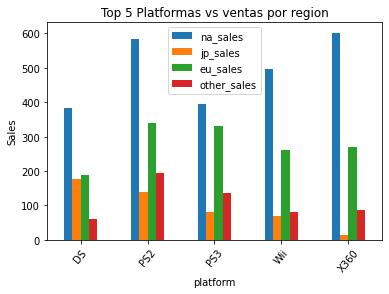

In [ ]:
# se genera grafico para mejor visualizacion
cols = ["na_sales", "jp_sales","eu_sales","other_sales"]
market_sales.plot(title = "Top 5 Platformas vs ventas por region",
                  kind = "bar",
                 x = "platform",
                 y = cols,
                 ylabel = "Sales",
                 rot = 50)
plt.show()

Gracias al grafico de barras, se puede concluir que las ventas de las plataformas son parecidas por region ( excluyendo other_sales). Mientras que si se compara por region, se nota que NA es el que mas vende seguido por EU.

### Top 5 Genero

,genre,na_sales,eu_sales,jp_sales,other_sales
0,Action,524.02,308.47,75.89,132.61
1,Sports,450.25,254.52,57.06,103.69
2,Shooter,338.75,188.13,16.73,70.27
3,Misc,299.72,164.75,61.70,65.20
4,Racing,184.20,134.75,18.25,54.46


,genre,jp_sales
0,Role-Playing,113.65
1,Action,75.89
2,Misc,61.70
3,Sports,57.06
4,Platform,28.49


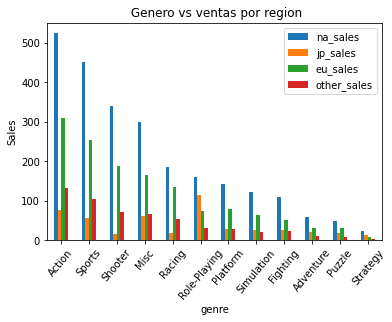

In [ ]:
# agrupo los generos con mas ventas por region
top_genre = games_top_plat.groupby("genre").agg({
    "na_sales" : "sum",
    "eu_sales" : "sum",
    "jp_sales" : "sum",
    "other_sales" : "sum",
   }).sort_values(by = ["na_sales","eu_sales","jp_sales","other_sales"], ascending = False).reset_index()
display(top_genre.head(5))

#na_top_genre = games_top_plat.groupby("genre").agg({
#    "na_sales" : "sum",
#   }).sort_values(by = ["na_sales"], ascending = False).reset_index()
#display(na_top_genre.head(5))
"""
eu_top_genre = games_top_plat.groupby("genre").agg({
    "eu_sales" : "sum",
   }).sort_values(by = ["eu_sales"], ascending = False).reset_index()
display(eu_top_genre.head(5))
"""
#Muestro la tabla por separado de JP para mostrar el top 5 ya que varia de las demas regiones

jp_top_genre = games_top_plat.groupby("genre").agg({
    "jp_sales" : "sum",
   }).sort_values(by = ["jp_sales"], ascending = False).reset_index()
display(jp_top_genre.head(5))
"""
other_top_genre = games_top_plat.groupby("genre").agg({
    "other_sales" : "sum",
   }).sort_values(by = ["other_sales"], ascending = False).reset_index()
display(other_top_genre.head(5))
"""
cols = ["na_sales", "jp_sales","eu_sales","other_sales"]
top_genre.plot(title = " Genero vs ventas por region",
                  kind = "bar",
                 x = "genre",
                 y = cols,
                 ylabel = "Sales",
                 rot = 50)
plt.show()

Al sacar el top5 de genero por region, se puede ver que son practicamente el mismo top5 de generos para todas las regions, Accion, Deportes, Shoote, Misc y Racing, la unica diferencia es para la region de Japon donde el top1, y el cual no aparece en el top 5 de las demas regiones es Role-Playing.

## Clasificacion ESRB vs Venta

Hipotesis

Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Nota: para poder hacer las hipotesis se debe de usar un DF con series separadas y sin valores ausentes.

### Hipotesis 1: Calificaciones promedio por plataforma
1. Hipotesis nula y alternativa

   H0: las calificaciones promedio entre XOne y PC son iguales
   
   H1: las calificaciones proemdio entre Xone y PC son diferentes

2. Definicion de este y significancia
   
   Nivel standar de alfa = 0.05
   Metodo: ttest


In [ ]:
# se limpian los df para xbox one y para Pc
score_xone = games_df[games_df["platform"] == "XOne"]["user_score"].dropna()
score_pc = games_df[games_df["platform"] == "PC"]["user_score"].dropna()

Prueba con levene para verificar las varianzas

    H0: las varianzas de los score de Xbox One y PC sin iguales
    H1: las varianzas de los score de Xbos One y PC son diferentes

In [ ]:
# calculo de varianza para las plataformas

alpha = 0.05

_, p_valor = st.levene(score_xone, score_pc)

print(f"La varianza de la calificacion de los usuarios para Xone es : {score_xone.var()}")
print(f"La varianza de la calificacion de los usuarios para PC es : {score_pc.var()}")
      
if p_valor < alpha:
    print("Rechazamos nuestra hipotesis nula")
    
else:
    print("No rechazamos nuestra hipotesis nula, las varianzas se pueden considerar iguales")
    

La varianza de la calificacion de los usuarios para Xone es : 1.9069968429360695
La varianza de la calificacion de los usuarios para PC es : 2.3407871413372066
No rechazamos nuestra hipotesis nula, las varianzas se pueden considerar iguales


In [ ]:
alpha = 0.05

_, p_valor = st.ttest_ind(score_xone, score_pc, equal_var = True)

print(f"La clasificacion promedio de los usuarios para Xone es : {score_xone.mean()}")
print(f"La clasificacion promedio de los usuarios para PC es : {score_pc.mean()}")
      
if p_valor < alpha:
    print("Rechazamos nuestra hipotesis nula")
else:
    print("No rechazamos nuestra hipotesis nula")
    
    
    

La clasificacion promedio de los usuarios para Xone es : 6.521428571428572
La clasificacion promedio de los usuarios para PC es : 7.062467532467533
Rechazamos nuestra hipotesis nula


Se concluye que los promedios de los usuarios para XOne y PC son diferentes.

### Hipotesis 2 Calificaciones promedio por 

1. Hipotesis nula y alternativa

   H0: las calificaciones promedio entre Accion y Deporte son iguales
   
   H1: las calificaciones proemdio entre Accion y Deporte son diferentes

2. Definicion de este y significancia
   
   Nivel standar de alfa = 0.05
   Metodo: ttest

In [ ]:
# se limpian los df para los generos accion y deportes
score_action = games_df[games_df["genre"] == "Action"]["user_score"].dropna()
score_sports = games_df[games_df["genre"] == "Sports"]["user_score"].dropna()

In [ ]:
alpha = 0.05

_, p_valor = st.ttest_ind(score_action, score_sports)

print(f"La clasificacion promedio de los usuarios para el genero Action es : {score_action.mean()}")
print(f"La clasificacion promedio de los usuarios para el genero Sports es : {score_sports.mean()}")
      
if p_valor < alpha:
    print("Rechazamos nuestra hipotesis nula")
else:
    print("No rechazamos nuestra hipotesis nula")
    
    
    

La clasificacion promedio de los usuarios para el genero Action es : 7.054043715846995
La clasificacion promedio de los usuarios para el genero Sports es : 6.961196736174069
No rechazamos nuestra hipotesis nula


Ya que el promedio tanto para el genero accions como para deportes es practicamente 7 podemos concluir que la hipotesis nula es verdadera.

Por lo que se puede concluir, que para promocionar un juego rentable, la recomendacion seria basarse en alguno de los tops 5 de genero. Enfocarse en el mercado de NA que es el que mas consume videojuegos. Y sacarlo para una consola que este a inicios de su vida ( aprox 2-3 años) justo antes de llegar a su tope para poder tener un aproximados de 5 años de ventas buenas antes de enfrentar el declive de ventas por la terminacion de su ciclo de vida.